# Notebook Power Prices Futures Prediction

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt
import os 
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')

import warnings
warnings.filterwarnings('ignore')
from mod import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
times_series = ['mu.ELEC_FR.DLI.']
countries_series = ['France DA (EUR/MWh)']

dates_series = pd.date_range(dt.date(2021,12,1),dt.date.today()-dt.timedelta(days=1),freq='d')
prices = pd.DataFrame(index = dates_series.strftime(medeco_dt_format)) 
prices.index.name = 'Date'

for name in times_series :
    prices_series = medeco_get_values(name, dt.date(2021,12,1), dt.date.today(), radicalDef = "B" , server = 'prod', format = 'df' )
    prices_series = prices_series.astype(float)
    prices_series.columns = [name]
    #prices_series.loc[prices_series.loc[name] == 'NaN'] = np.NaN 
    prices = pd.concat([prices,prices_series], axis = 1)

prices.columns = countries_series
prices.index.name = 'Date'
prices.dropna(axis = 0, inplace = True)
prices.to_csv("French Power Prices Medeco.txt", sep = ',')
prices.head(5)

,France DA (EUR/MWh)
Date,
2021-12-01,277.77
2021-12-02,299.22
2021-12-03,222.17
2021-12-06,258.65
2021-12-07,247.43


Rafraichir le script a partir de cette ligne si les prix sont a jour.

In [14]:
prices = pd.read_csv("French Power Prices Medeco.txt")
prices["Date"] = pd.to_datetime(prices["Date"])
prices.head()

,Date,France DA (EUR/MWh)
0,2021-12-01,277.77
1,2021-12-02,299.22
2,2021-12-03,222.17
3,2021-12-06,258.65
4,2021-12-07,247.43


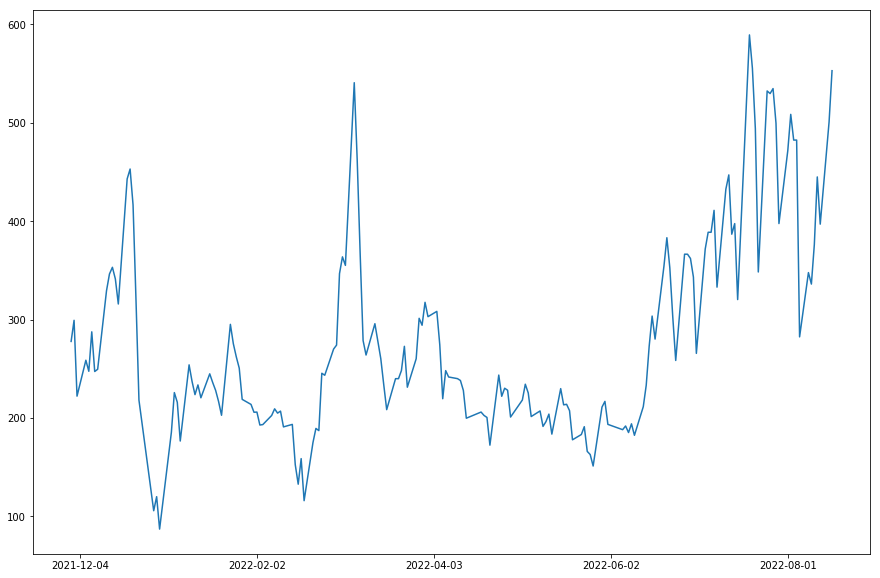

In [15]:
plt.figure(figsize = (15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 60))
plt.plot( prices['Date'], prices['France DA (EUR/MWh)']);

Data preprocessing